<a href="https://colab.research.google.com/github/bilalsarimeseli/Data_Science_For_Science/blob/main/Data_Science_for_Science(SVM).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **SUPPORT VECTOR MACHINES**

The objective of the support vector machine algorithm is to find a hyperplane in an **N-dimensional space** (**N** — the number of features) that distinctly classifies the data points.

![image](https://nl.mathworks.com/discovery/support-vector-machine/_jcr_content/mainParsys/image.adapt.full.medium.jpg/1701681577407.jpg)

There exist numerous potential hyperplanes for delineating the two classes of data points. Our goal is to identify a plane with *the maximum margin*, signifying the greatest distance between data points belonging to different classes. Enhancing the margin distance serves to bolster the confidence in classifying future data points.


**Hyperplanes and Support Vectors**

Hyperplanes serve as decision boundaries facilitating the classification of data points. Data points situated on distinct sides of the hyperplane are assigned to different classes. Furthermore, the dimensionality of the hyperplane is contingent on the number of features. In cases where there are 2 input features, the hyperplane manifests as a line. With 3 input features, the hyperplane transforms into a two-dimensional plane. Visualization becomes challenging as the number of features surpasses 3.

![Hyperplane](https://miro.medium.com/v2/resize:fit:1400/format:webp/1*ZpkLQf2FNfzfH4HXeMw4MQ.png)


Support vectors refer to data points in proximity to the hyperplane, exerting influence on both its position and orientation. By leveraging these support vectors, we aim to maximize the margin of the classifier. The removal of support vectors can alter the hyperplane's position. These pivotal points play a crucial role in constructing our Support Vector Machine (SVM).

![SV](https://miro.medium.com/v2/resize:fit:1100/format:webp/0*ecA4Ls8kBYSM5nza.jpg)

In [1]:
### Let's start by importing standard libraries.

%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
from sklearn.svm import SVC

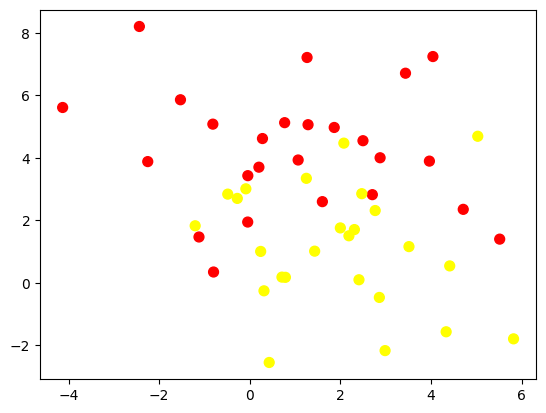

In [3]:
### Let's create some classes to use as our dataset.
### We can do so with the 'make_blobs' function.

from sklearn.datasets import make_blobs
X, y = make_blobs(n_samples=50, centers=2,
                  random_state=0, cluster_std=2.0)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

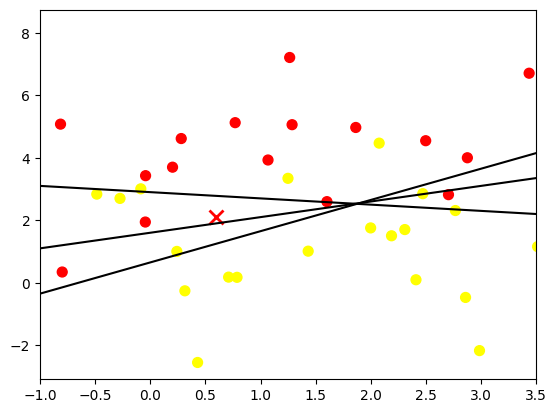

In [4]:
# Establishing a line to delineate the class boundaries.
# Note that we have multiple choices regarding the line we opt for to separate the classes.

xfit = np.linspace(-1, 3.5)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plt.plot([0.6], [2.1], 'x', color='red', markeredgewidth=2, markersize=10)

for m, b in [(1, 0.65), (0.5, 1.6), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

plt.xlim(-1, 3.5);

In [5]:
def plot_svc_decision_function(model, ax=None, plot_support=True):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()

    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)

    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

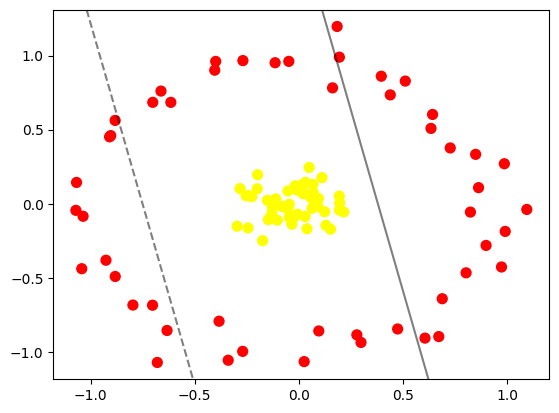

In [6]:
### The real benefit of support vectors come when we alter the kernel.
### First, let's see the problem with a linear kernel.

from sklearn.datasets import make_circles

X, y = make_circles(100, factor=.1, noise=.1)

clf = SVC(kernel='linear').fit(X, y)
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf, plot_support=False);

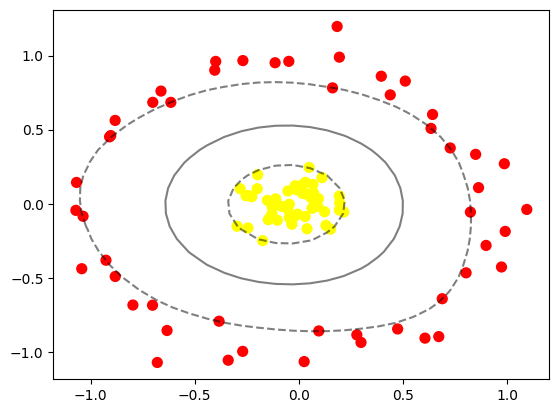

In [7]:
### Notice that by mapping to a higher-dimensional space, we can create non-linear decision
### boundaries in 2D-space.

clf = SVC(kernel='rbf', C=1E6)
clf.fit(X, y)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');